**Section 2.1 - Images**

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange
from torchvision import datasets, transforms

In [12]:
# Download MNIST dataset
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

In [13]:
# Select 1000 samples manually without using Subset
indices = torch.randperm(len(mnist_data))[:1000]  # Randomly select 1000 indices
images = torch.stack([mnist_data[i][0] for i in indices]).squeeze(1)    # Stack images into a tensor
labels = torch.tensor([mnist_data[i][1] for i in indices])  # Collect labels

In [14]:
# Print dataset shape
print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")

Images shape: torch.Size([1000, 28, 28]), Labels shape: torch.Size([1000])


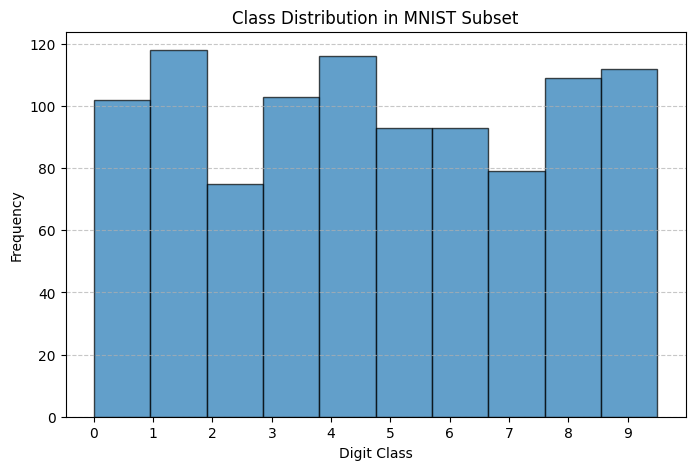

In [15]:
# Plot histogram of class distribution
plt.figure(figsize=(8, 5))
plt.hist(labels.numpy(), bins=10, range=(0, 9.5), edgecolor="black", alpha=0.7)
plt.xticks(range(10))
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Class Distribution in MNIST Subset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [16]:
# Batch size
batch_size = 25
num_batches = images.shape[0] // batch_size  # Ensure full batches

# Reshape using einops
batched_images = rearrange(images[:num_batches * batch_size], '(b s) h w -> b s 1 h w', s=batch_size)

# Print new shape
print(f"Batched Images shape: {batched_images.shape}")

Batched Images shape: torch.Size([40, 25, 1, 28, 28])


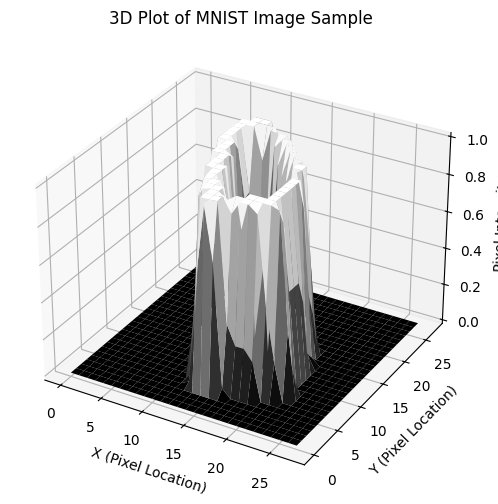

In [17]:
# Randomly select one image from the subset
rand_index = torch.randint(0, images.shape[0], (1,)).item()
selected_image = images[rand_index].numpy()  # Convert to NumPy array

# Generate x, y coordinates for each pixel
x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)
Z = selected_image  # Pixel intensities

# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='gray', edgecolor='none')

# Labels and title
ax.set_xlabel("X (Pixel Location)")
ax.set_ylabel("Y (Pixel Location)")
ax.set_zlabel("Pixel Intensity")
ax.set_title("3D Plot of MNIST Image Sample")

plt.show()

Section 2.2 - Time Series

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [19]:
# Load the dataset
data = pd.read_csv("./energydata_complete.csv", parse_dates=['date'], index_col='date')

In [20]:
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


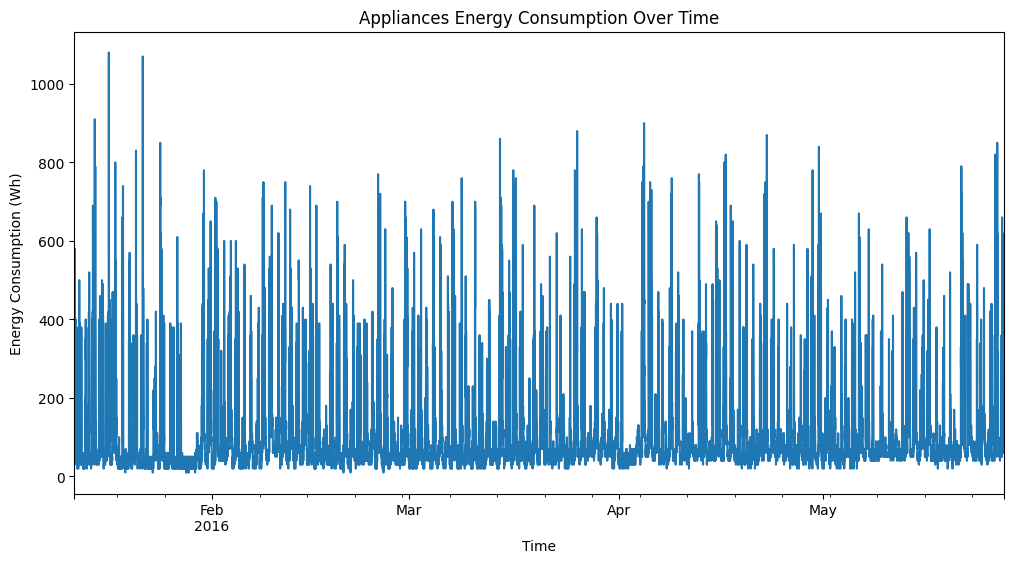

In [21]:
# 1. Plot the appliances energy consumption for whole period and a closer look at any one week of consumption
plt.figure(figsize=(12, 6))
data['Appliances'].plot(title='Appliances Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

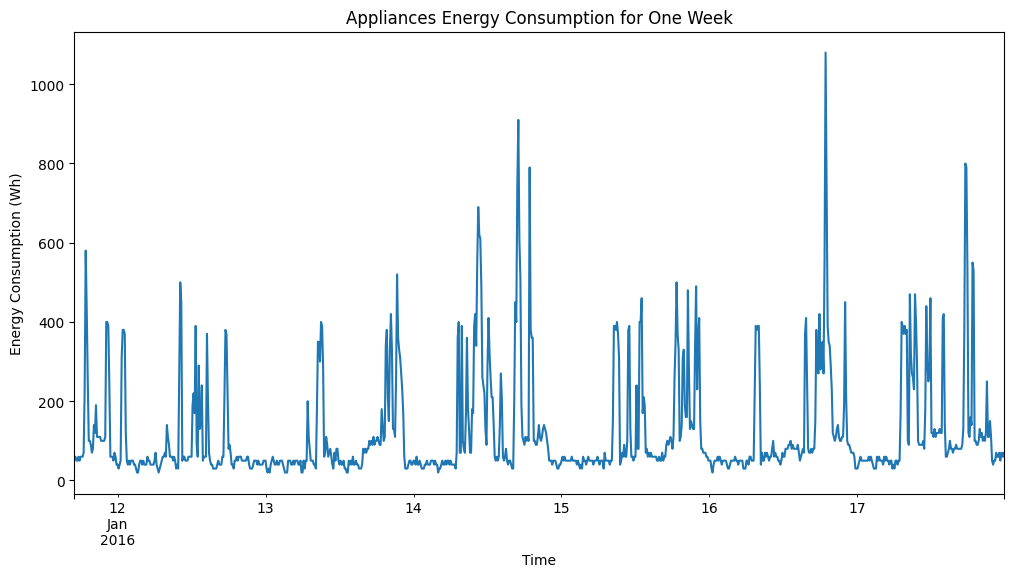

In [22]:
# Select one week of data
date_range = ('2016-01-11', '2016-01-17')
data_week = data.loc[date_range[0]:date_range[1]]
plt.figure(figsize=(12, 6))
data_week['Appliances'].plot(title='Appliances Energy Consumption for One Week')
plt.xlabel('Time')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

/tmp/ipykernel_41554/94465799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_week['Hour'] = data_week.index.hour
/tmp/ipykernel_41554/94465799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_week['DayOfWeek'] = data_week.index.dayofweek


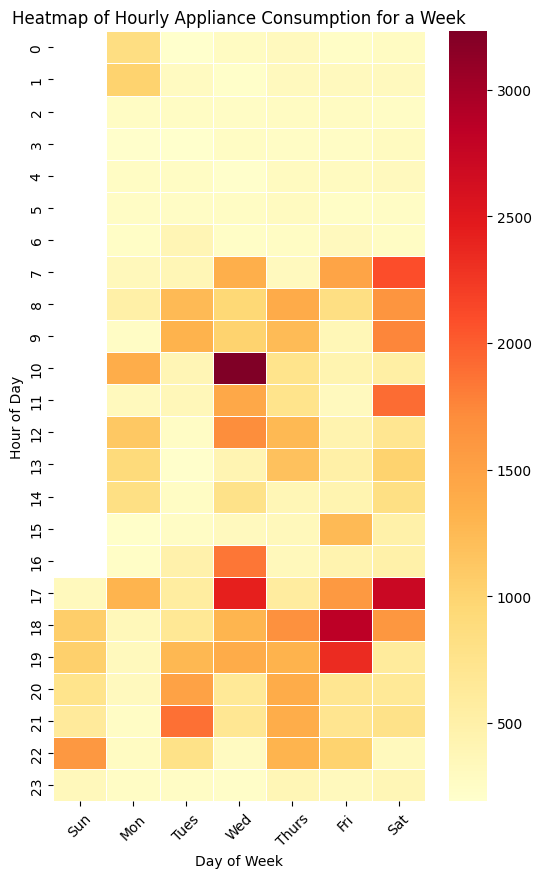

In [23]:
# 2. Plot heatmap of hourly consumption of appliances for a week
data_week['Hour'] = data_week.index.hour
data_week['DayOfWeek'] = data_week.index.dayofweek
data_pivot = data_week.pivot_table(index='Hour', columns='DayOfWeek', values='Appliances', aggfunc='sum')

plt.figure(figsize=(6, 10))
sns.heatmap(data_pivot, cmap="YlOrRd", annot=False, linewidths=0.5)
plt.title('Heatmap of Hourly Appliance Consumption for a Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(ticks=np.arange(7) + 0.5, labels=['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'], rotation=45)
plt.show()

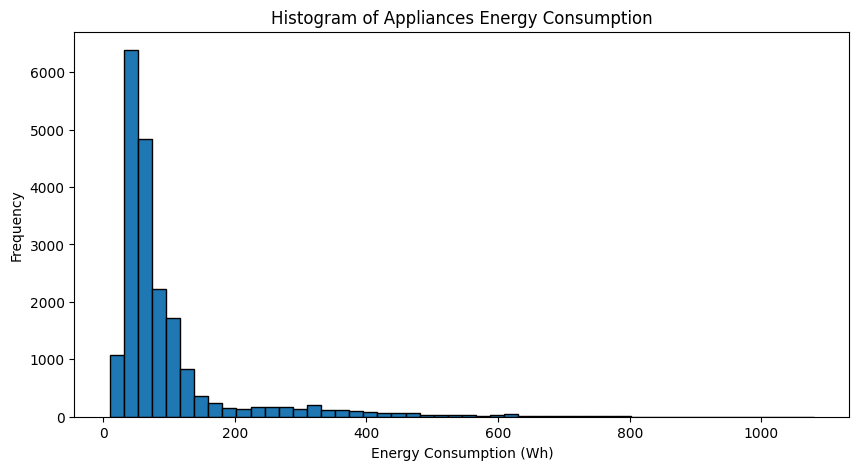

In [24]:
# 3. Plot histogram of energy consumption of appliances
plt.figure(figsize=(10, 5))
plt.hist(data['Appliances'], bins=50, edgecolor='black')
plt.title('Histogram of Appliances Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

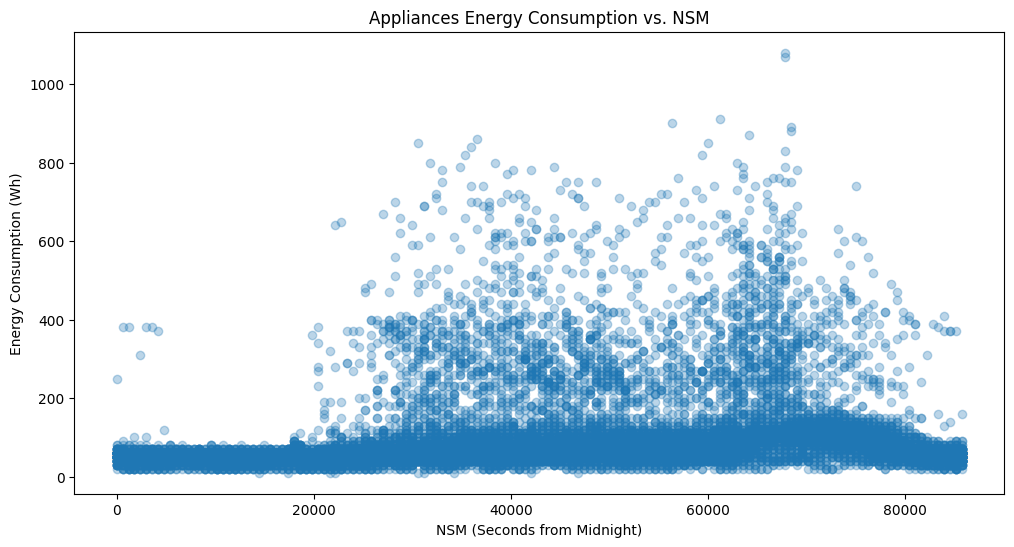

In [25]:
# 4. Construct NSM (Number of Seconds from Midnight) and plot energy consumption vs. NSM
data['NSM'] = data.index.hour * 3600 + data.index.minute * 60 + data.index.second
plt.figure(figsize=(12, 6))
plt.scatter(data['NSM'], data['Appliances'], alpha=0.3)
plt.title('Appliances Energy Consumption vs. NSM')
plt.xlabel('NSM (Seconds from Midnight)')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

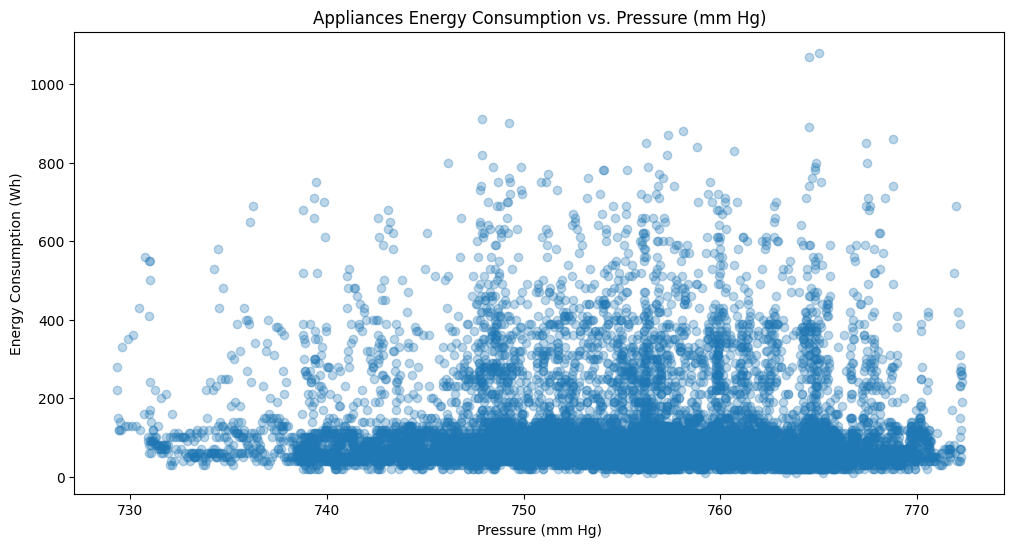

In [26]:
# 5. Plot appliances energy consumption vs. Press mm Hg
plt.figure(figsize=(12, 6))
plt.scatter(data['Press_mm_hg'], data['Appliances'], alpha=0.3)
plt.title('Appliances Energy Consumption vs. Pressure (mm Hg)')
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

In [27]:
# 6. Comment on major contributing factors
"""
From the scatter plots, we observe that:
- NSM (Number of Seconds from Midnight) shows a clear trend with energy consumption, indicating a strong relationship between time of day and appliance usage.
- Pressure (mm Hg) also shows some variation with appliance energy consumption, but the relationship is weaker compared to NSM.
- This suggests that energy consumption is significantly influenced by the time of day, likely due to human activity patterns, while atmospheric pressure has a comparatively smaller impact.
"""

'\nFrom the scatter plots, we observe that:\n- NSM (Number of Seconds from Midnight) shows a clear trend with energy consumption, indicating a strong relationship between time of day and appliance usage.\n- Pressure (mm Hg) also shows some variation with appliance energy consumption, but the relationship is weaker compared to NSM.\n- This suggests that energy consumption is significantly influenced by the time of day, likely due to human activity patterns, while atmospheric pressure has a comparatively smaller impact.\n'

Section 2.3 - Multi-variate

In [28]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [29]:
column_names = ["Frequency", "Angle_of_Attack", "Chord_Length", "Free_stream_Velocity", "Suction_Side_Displacement_Thickness", "Scaled_Sound_Pressure_Level"]

In [30]:
path = "./airfoil_self_noise.dat"
df = pd.read_csv(path, sep='\t', header=None, names=column_names)

In [31]:
# Compute Descriptive Statistics
stats_summary = {
    "Mean": df.mean(),
    "Variance": df.var(),
    "Standard Deviation": df.std(),
    "Median": df.median(),
    "Kurtosis": df.kurtosis(),
    "Skewness": df.skew(),
    "Range": df.max() - df.min()
}


In [32]:
stats_df = pd.DataFrame(stats_summary)

In [33]:
stats_df

,Mean,Variance,Standard Deviation,Median,Kurtosis,Skewness,Range
Frequency,2886.380572,9.938717e+06,3152.573137,1600.000000,5.708685,2.137084,19800.000000
Angle_of_Attack,6.782302,3.502424e+01,5.918128,5.400000,-0.412951,0.689164,22.200000
Chord_Length,0.136548,8.749868e-03,0.093541,0.101600,-1.037964,0.457457,0.279400
Free_stream_Velocity,50.860745,2.425116e+02,15.572784,39.600000,-1.563951,0.235852,39.600000
Suction_Side_Displacement_Thickness,0.011140,1.729287e-04,0.013150,0.004957,2.218903,1.702165,0.058011
Scaled_Sound_Pressure_Level,124.835943,4.759146e+01,6.898657,125.721000,-0.314187,-0.418952,37.607000


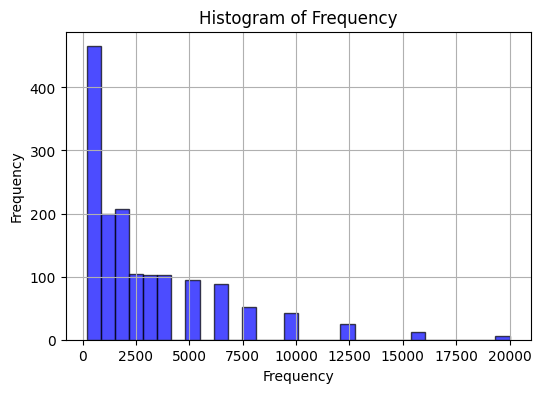

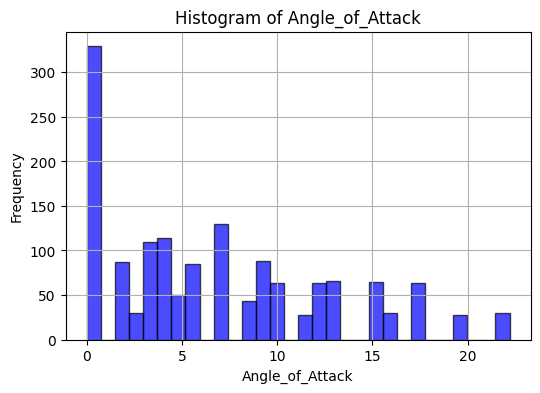

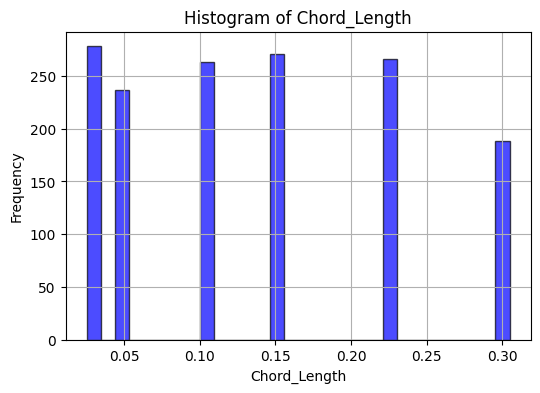

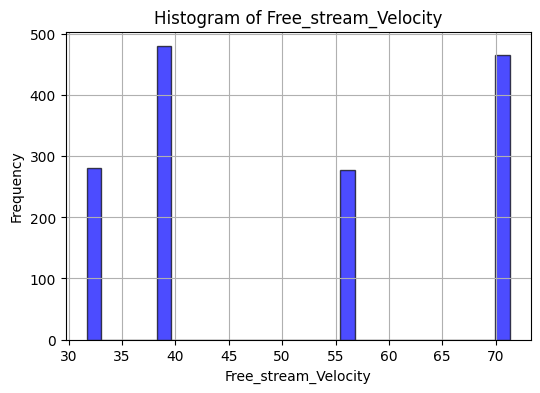

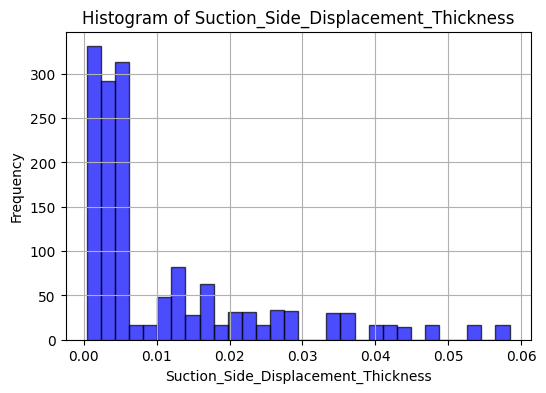

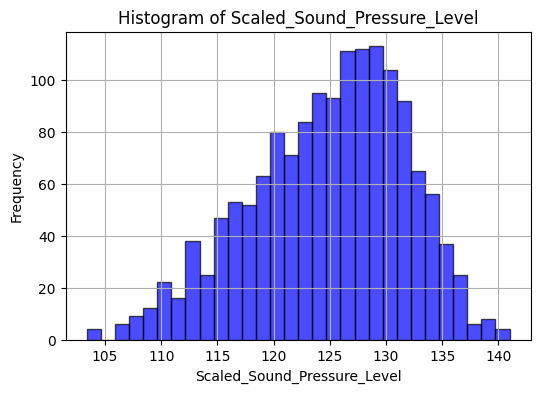

In [34]:
# Plot histograms for each variable
for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=30, alpha=0.7, color='b', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()